In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.calibration import calibration_curve

nltk.download('wordnet')  
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Error loading wordnet: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


In [3]:
lemmatizer = WordNetLemmatizer()

def remove_stop_words(text):
    clean_text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
    return clean_text

def tokenize_text(text):
    return nltk.word_tokenize(text)

def lemmatize_sentence(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_sentence = ' '.join(lemmatized_tokens)
    return lemmatized_sentence

In [4]:
dataset = pd.read_csv('../../Depression/Data/Clean Dataset.csv')
dataset

,tweets,is_depression
0,real reason youre sad youre attached people di...,1
1,biggest problem overthinking everything,1
2,worst sadness sadness youve taught hide,1
3,can not make understand can not make anyone un...,1
4,dont think anyone really understands tiring ac...,1
...,...,...
16031,cardi b want trademark catchphrase okurr think...,0
16032,ill bet kellyanne george conway pretty disturb...,0
16033,fan always asking watch old stuff finally answ...,0
16034,ray romano hilarious comedian kind soul rare n...,0


In [6]:
# Models
import pickle

model_suicide = pickle.load(open('../../Suicide/Voting_classifier.pkl', 'rb'))
model_anxiety = pickle.load(open('../../Anxiety/models/split 4/Voting_classifier_4.pkl', 'rb'))

/Users/yben409/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator GaussianNB from version 1.0.2 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/yben409/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator BernoulliNB from version 1.0.2 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/yben409/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator MultinomialNB from version 1.0.2 when using version 

In [7]:
# TF IDF Vectorizers
suicide_vectorizer = pickle.load(open('../../Suicide/grid_search_15000_tfidf.pkl', 'rb'))
anxiety_vectorizer = pickle.load(open('../../Anxiety/models/split 4/grid_search_5000_tfidf.pkl', 'rb'))

/Users/yben409/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.0.2 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/yben409/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.0.2 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [8]:
len(dataset[dataset['tweets'].isnull()].index)

27

In [9]:
dataset.dropna(inplace=True)
len(dataset[dataset['tweets'].isnull()].index)

0

In [10]:
X = dataset['tweets']

In [11]:
X_suicide_vectorized = suicide_vectorizer.transform(X)
X_anxiety_vectorized = anxiety_vectorizer.transform(X)

In [12]:
X_suicide_vectorized_dense = X_suicide_vectorized.toarray()
X_anxiety_vectorized_dense = X_anxiety_vectorized.toarray()
X_anxiety_vectorized_dense

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
is_suicidal = model_suicide.predict(X_suicide_vectorized_dense) 

In [14]:
len(is_suicidal)

16009

In [15]:
is_anxious = model_anxiety.predict(X_anxiety_vectorized_dense) 

In [16]:
is_anxious

array([4, 4, 0, ..., 4, 4, 4])

In [17]:
is_anxious = np.array([1 if element == 4 else element for element in is_anxious])

In [18]:
is_anxious

array([1, 1, 0, ..., 1, 1, 1])

In [19]:
is_anxious = pd.Series(is_anxious)
is_suicidal = pd.Series(is_suicidal)

In [20]:
print(is_anxious.isnull().sum())
print(is_anxious.isna().sum())

0
0


In [21]:
print(is_suicidal.isnull().sum())
print(is_suicidal.isna().sum())

0
0


In [22]:
dataset['is_anxious'] = is_anxious
dataset['is_suicidal'] = is_suicidal

In [23]:
dataset

,tweets,is_depression,is_anxious,is_suicidal
0,real reason youre sad youre attached people di...,1,1.0,1.0
1,biggest problem overthinking everything,1,1.0,0.0
2,worst sadness sadness youve taught hide,1,0.0,1.0
3,can not make understand can not make anyone un...,1,0.0,1.0
4,dont think anyone really understands tiring ac...,1,0.0,1.0
...,...,...,...,...
16031,cardi b want trademark catchphrase okurr think...,0,NaN,NaN
16032,ill bet kellyanne george conway pretty disturb...,0,NaN,NaN
16033,fan always asking watch old stuff finally answ...,0,NaN,NaN
16034,ray romano hilarious comedian kind soul rare n...,0,NaN,NaN


In [24]:
print(dataset[dataset['is_anxious'].isna()].index)
print(dataset[dataset['is_suicidal'].isna()].index)

Index([16009, 16010, 16011, 16012, 16013, 16014, 16015, 16016, 16017, 16018,
       16019, 16020, 16021, 16022, 16023, 16024, 16025, 16026, 16027, 16028,
       16029, 16030, 16031, 16032, 16033, 16034, 16035],
      dtype='int64')
Index([16009, 16010, 16011, 16012, 16013, 16014, 16015, 16016, 16017, 16018,
       16019, 16020, 16021, 16022, 16023, 16024, 16025, 16026, 16027, 16028,
       16029, 16030, 16031, 16032, 16033, 16034, 16035],
      dtype='int64')


In [25]:
missing_indexes = dataset[dataset['is_suicidal'].isna()].index
missing_indexes

Index([16009, 16010, 16011, 16012, 16013, 16014, 16015, 16016, 16017, 16018,
       16019, 16020, 16021, 16022, 16023, 16024, 16025, 16026, 16027, 16028,
       16029, 16030, 16031, 16032, 16033, 16034, 16035],
      dtype='int64')

In [26]:
dataset = dataset.drop(missing_indexes)

In [27]:
dataset.isnull().sum()

tweets           0
is_depression    0
is_anxious       0
is_suicidal      0
dtype: int64

In [28]:
dataset['is_anxious'] = dataset['is_anxious'].astype(int)
dataset['is_suicidal'] = dataset['is_suicidal'].astype(int)

In [29]:
dataset

,tweets,is_depression,is_anxious,is_suicidal
0,real reason youre sad youre attached people di...,1,1,1
1,biggest problem overthinking everything,1,1,0
2,worst sadness sadness youve taught hide,1,0,1
3,can not make understand can not make anyone un...,1,0,1
4,dont think anyone really understands tiring ac...,1,0,1
...,...,...,...,...
16004,worry release mueller report going overshadow ...,0,1,0
16005,cant beyonce drop mueller report,0,0,0
16006,watch first nine minute conanaustralia tune tb...,0,1,0
16007,cheer australian american crew conanaustralia ...,0,1,0


In [30]:
X = dataset.iloc[:,0].values
y = dataset.iloc[:,1:].values

In [31]:
y

array([[1, 1, 1],
       [1, 1, 0],
       [1, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)
len(X_train)

14383

In [219]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

max_features_values = [15000, 20000, 30000]

tfidf_vectorizer = TfidfVectorizer()
 
param_grid = {
    'max_features': max_features_values,
}

grid_search = GridSearchCV(tfidf_vectorizer, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_max_features = grid_search.best_params_['max_features']

print(f"Best max_features: {best_max_features}")

best_tfidf_vectorizer = grid_search.best_estimator_

/Users/yben409/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


Best max_features: 15000


In [133]:
pickle.dump(best_tfidf_vectorizer, open('grid_search_15000_tfidf.pkl', 'wb'))

In [34]:
best_tfidf_vectorizer = pickle.load(open('grid_search_15000_tfidf.pkl', 'rb'))

In [35]:
X_train_tfidf = best_tfidf_vectorizer.transform(X_train)
X_test_tfidf = best_tfidf_vectorizer.transform(X_test)

num_train_samples, _ = X_train_tfidf.shape
num_test_samples, _ = X_test_tfidf.shape

print(f"Number of training samples: {num_train_samples}")
print(f"Number of test samples: {num_test_samples}")

Number of training samples: 14383
Number of test samples: 1599


In [36]:
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

In [222]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.multioutput import MultiOutputClassifier

nb = GaussianNB()
nb2 = BernoulliNB()
nb3 = MultinomialNB()
VotingClassifiers = VotingClassifier(estimators=[('GaussianNB', nb),('BernoulliNB',nb2), ('MultinomialNB', nb3)], voting='soft')

multi_output_voting_clf = MultiOutputClassifier(estimator=VotingClassifiers)

multi_output_voting_clf.fit(X_train_dense, y_train)

MultiOutputClassifier(estimator=VotingClassifier(estimators=[('GaussianNB',
                                                              GaussianNB()),
                                                             ('BernoulliNB',
                                                              BernoulliNB()),
                                                             ('MultinomialNB',
                                                              MultinomialNB())],
                                                 voting='soft'))

In [38]:
multi_output_voting_clf = pickle.load(open('Voting_classifier.pkl', 'rb'))

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
import pickle

rf = RandomForestClassifier(n_estimators=100, random_state=42)

multi_output_rf = MultiOutputClassifier(estimator=rf)

multi_output_rf.fit(X_train_dense, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

In [40]:
y_pred_rf = multi_output_rf.predict(X_test_dense)
y_pred_voting = multi_output_voting_clf.predict(X_test_dense)

In [41]:
y_pred_rf, y_test

(array([[0, 1, 0],
        [1, 0, 1],
        [0, 1, 0],
        ...,
        [0, 1, 0],
        [0, 0, 0],
        [1, 0, 0]]),
 array([[0, 1, 0],
        [1, 0, 1],
        [0, 0, 1],
        ...,
        [0, 0, 1],
        [0, 1, 0],
        [1, 0, 1]]))

Precision: 0.63
Recall: 0.59
F1-Score: 0.61


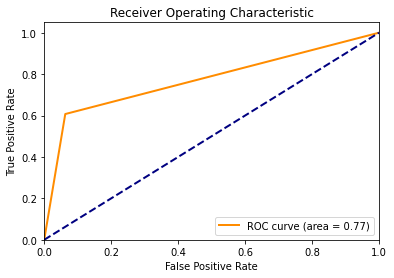

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

precision = precision_score(y_test, y_pred_voting, average='micro')
recall = recall_score(y_test, y_pred_voting, average='micro')
f1 = f1_score(y_test, y_pred_voting, average='micro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

roc_auc_scores = []
for i in range(y_test.shape[1]):
    roc_auc = roc_auc_score(y_test[:, i], y_pred_voting[:, i])
    roc_auc_scores.append(roc_auc)

fpr, tpr, _ = roc_curve(y_test[:, 0], y_pred_voting[:, 0])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_scores[0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Precision: 0.75
Recall: 0.62
F1-Score: 0.68


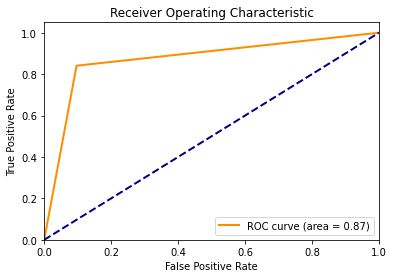

In [44]:
precision = precision_score(y_test, y_pred_rf, average='micro')
recall = recall_score(y_test, y_pred_rf, average='micro')
f1 = f1_score(y_test, y_pred_rf, average='micro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

roc_auc_scores = []
for i in range(y_test.shape[1]):
    roc_auc = roc_auc_score(y_test[:, i], y_pred_rf[:, i])
    roc_auc_scores.append(roc_auc)

fpr, tpr, _ = roc_curve(y_test[:, 0], y_pred_rf[:, 0])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_scores[0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [234]:
def preprocess(element):
    element = element.lower() #convert to lower case 
    element = element.replace(r'[^\w\s]+', '') #remove punctuations
    element = [word for word in element.split() if word not in (stop_words)] #tokenize the sentence
    element = ' '.join([lemmatizer.lemmatize(i) for i in element]) #lemmatizing
    inputToModel = best_tfidf_vectorizer.transform([element]).toarray() #transform to vector form
    return inputToModel

In [235]:
def predict_voting(input_text):
    print('Input : ',input_text) 
    processed_array = preprocess(input_text) 
    predict = multi_output_rf.predict(processed_array) #Model prediction
    print(predict)

In [244]:
dataset

,tweets,is_depression,is_anxious,is_suicidal
0,real reason youre sad youre attached people di...,1,1,1
1,biggest problem overthinking everything,1,1,0
2,worst sadness sadness youve taught hide,1,0,1
3,can not make understand can not make anyone un...,1,0,1
4,dont think anyone really understands tiring ac...,1,0,1
...,...,...,...,...
16004,worry release mueller report going overshadow ...,0,1,0
16005,cant beyonce drop mueller report,0,0,0
16006,watch first nine minute conanaustralia tune tb...,0,1,0
16007,cheer australian american crew conanaustralia ...,0,1,0


In [240]:
predict_voting('I woke up today all dizzy, no friends as always. I wanna die')

Input :  I woke up today all dizzy, no friends as always. I wanna die
[[1 0 1]]


In [242]:
predict_voting("Let's have an ice cream")

Input :  Let's have an ice cream
[[0 0 0]]


In [249]:
predict_voting("I wanna end my life")

Input :  I wanna end my life
[[1 0 1]]


In [252]:
predict_voting("I broke up with my girlfriend")

Input :  I broke up with my girlfriend
[[1 1 1]]
